<a href="https://colab.research.google.com/github/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/blob/main/Chapter02/Detectron2-Chapter02-Object%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

Should change runtime to have GPU Hardware accelerator: Runtime > Change runtime > Hardware accelerator: GPU.

In [ ]:
!python --version

In [ ]:
import torch
print(torch.__version__)

1.12.1+cu113


In [ ]:
!python -m pip install \
'git+https://github.com/facebookresearch/detectron2.git'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-bacab85j
  Running command git clone -q https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-bacab85j
     |████████████████████████████████| 50 kB 4.9 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 151 kB 68.1 MB/s 
     |████████████████████████████████| 1.4 MB 63.7 MB/s 
     |████████████████████████████████| 509 kB 69.0 MB/s 
     |████████████████████████████████| 248 kB 69.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 96 kB 7.2 MB/s 
     |████████████████████████████████| 843 kB 63.7 MB/s 
     |████████████████████████████████| 117 kB 66.9 MB/s 
  Created whee

In [ ]:
!python --version

In [ ]:
# check the available configuration files in model zoo
!sudo apt-get install tree
!tree /usr/local/lib/python3.9/dist-packages/detectron2/model_zoo

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 40.7 kB of archives.
After this operation, 105 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tree amd64 1.7.0-5 [40.7 kB]
Fetched 40.7 kB in 0s (125 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: 

# Get a predictor

In [ ]:
import detectron2
from detectron2.config import get_cfg
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
# Suppress some user warnings
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
# Select a model
config_file = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
checkpoint_url = "COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"
# Create a configuration file
cfg = get_cfg()
config_file = model_zoo.get_config_file(config_file)
cfg.merge_from_file(config_file)
# Download weights
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url(checkpoint_url)
score_thresh_test = 0.95
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = score_thresh_test
predictor = DefaultPredictor(cfg)

# Perform inference

In [ ]:
!wget https://raw.githubusercontent.com/PacktPublishing/Hands-On-Computer-Vision-with-Detectron2/main/datasets/960x720image/input.jpg

In [ ]:
import cv2
input_url = "input.jpg"
img = cv2.imread(input_url)
output = predictor(img)

In [ ]:
print(output)

{'instances': Instances(num_instances=4, image_height=720, image_width=960, fields=[pred_boxes: Boxes(tensor([[492.1558, 331.5353, 687.8397, 637.9542],
        [294.6652, 192.1288, 445.8517, 655.3390],
        [419.8898, 253.9013, 507.7427, 619.1491],
        [451.8833, 395.1392, 558.5139, 671.0604]], device='cuda:0')), scores: tensor([0.9991, 0.9986, 0.9945, 0.9889], device='cuda:0'), pred_classes: tensor([0, 0, 0, 0], device='cuda:0')])}


# Visualization

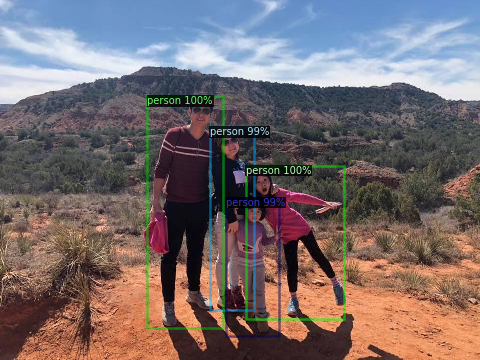

In [ ]:
from google.colab.patches import cv2_imshow
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog
metadata = MetadataCatalog.get(cfg.DATASETS.TRAIN[0])
v = Visualizer(img[:, :, ::-1], metadata, scale=0.5)
instances = output["instances"].to("cpu")
annotated_img = v.draw_instance_predictions(instances)
cv2_imshow(annotated_img.get_image()[:, :, ::-1])